In [1]:
from acevedo_clss_and_fcns import * 
device = 'cpu'
if torch.cuda.is_available():
    torch.cuda.init()
    if torch.cuda.is_initialized():
        device = 'cuda:0'
#device = torch.device(device)
print(f"{device = }")
#loader_path = "./results/dataloaders/loader_Concen_plus_Fluxes.pt"
#loader = torch.load(loader_path)
#loader_validation = loader.get_validation_loader()
#loader_train = loader.get_train_loader()
#all_graphs_weights_df.to_parquet('./results/data/non_filtered_graphs_weights_from_explainer.parquet.gzip', compression = 'gzip')

all_graphs_weights_df = pd.read_parquet('./results/data/data_for_R/Non_masked_graphs_weights_from_explainer.parquet.gzip')

print(f"{all_graphs_weights_df.shape=}")

/DeepenData/.miniconda/envs/geo/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device = 'cuda:0'
all_graphs_weights_df.shape=(38428, 4921)


((385, 4921), (38428,))

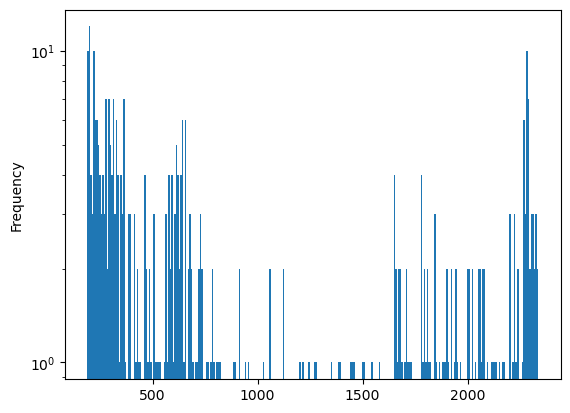

In [2]:

edge_mask = all_graphs_weights_df.sum(axis=1) > np.percentile(all_graphs_weights_df.sum(axis=1), 99)


filtered_graph_weights_df = all_graphs_weights_df.loc[  edge_mask, :]

filtered_graph_weights_df.sum(axis=1).plot.hist(logy = True, bins=300)
filtered_graph_weights_df.shape, edge_mask.shape

<AxesSubplot:ylabel='Frequency'>

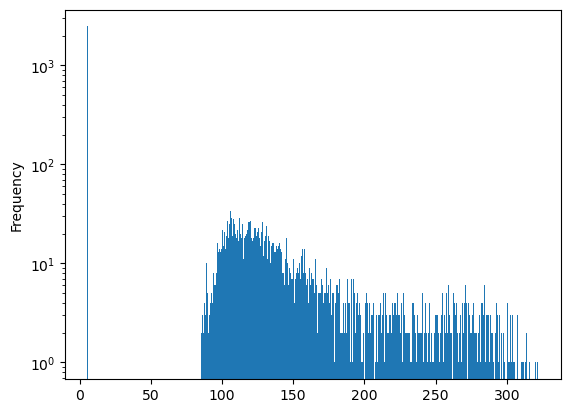

In [3]:
filtered_graph_weights_df.sum(axis=0).plot.hist(logy = True, bins=500)


In [4]:
train_labels = pd.read_csv("./results/data/data_for_R/Non_Masked_train_labels.csv").drop('Unnamed: 0', axis=1)['0']

filtered_graph_weights = filtered_graph_weights_df.transpose() #.columns = train_labels
filtered_graph_weights["Label"] = list(train_labels)

filtered_graph_weights.reset_index(drop=True, inplace=True)
filtered_graph_weights.columns = [str(col) for col in filtered_graph_weights.columns]
#filtered_graph_weights.to_parquet('./results/data/filtered_graph_weights.parquet.gzip', compression = 'gzip')
filtered_graph_weights

,89,176,478,532,533,1203,1205,2008,2026,2028,...,36395,36594,36596,37589,37742,37828,37829,37842,38206,Label
0,0.014385,0.014653,0.014533,0.697588,0.020129,0.628619,0.018397,0.040191,0.596154,0.019811,...,0.891423,0.025438,0.726241,0.238375,0.014415,0.020551,0.678947,0.063387,0.356092,Control
1,0.011012,0.010811,0.010893,0.147041,0.019571,0.344584,0.019298,0.088213,0.303993,0.019960,...,0.871683,0.019605,0.132973,0.014114,0.011178,0.022101,0.540139,0.064093,0.030769,Control
2,0.013806,0.013767,0.013741,0.013848,0.013831,0.013719,0.013959,0.013817,0.013925,0.013874,...,0.013906,0.013623,0.013755,0.013711,0.013807,0.013686,0.013634,0.013764,0.013875,PKU
3,0.013806,0.013774,0.013772,0.013737,0.013778,0.013715,0.013835,0.013651,0.013704,0.013816,...,0.013769,0.013761,0.013787,0.013926,0.013675,0.013782,0.013885,0.013916,0.013786,PKU
4,0.037142,0.041098,0.038688,0.684845,0.031661,0.715710,0.032574,0.133804,0.707479,0.083113,...,0.807985,0.037618,0.683581,0.563452,0.036387,0.042798,0.715388,0.375260,0.566741,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,0.091757,0.104231,0.099442,0.726709,0.076526,0.684129,0.058139,0.230053,0.666503,0.069343,...,0.772876,0.134823,0.703012,0.661406,0.086485,0.086213,0.703119,0.549427,0.656380,Control
4917,0.139979,0.167696,0.153985,0.745279,0.077942,0.720018,0.064034,0.365714,0.712111,0.137514,...,0.753243,0.220323,0.741502,0.677850,0.132335,0.461182,0.762884,0.653751,0.690181,Control
4918,0.081921,0.093851,0.088249,0.725146,0.054164,0.702764,0.047806,0.178054,0.637833,0.076475,...,0.759209,0.072655,0.676546,0.594077,0.077464,0.074207,0.687474,0.573836,0.551776,Control
4919,0.013657,0.013793,0.013745,0.013715,0.013844,0.013713,0.013746,0.013810,0.013603,0.013877,...,0.013787,0.013639,0.013883,0.013821,0.013664,0.013698,0.013762,0.013887,0.013885,PKU


In [5]:
PYG_graph = torch.load("./results/graphs_from_PYG_and_NX/PYG_graph_Concen_plus_Fluxes.pt")


NX_graph  = nx.read_gpickle("./results/graphs_from_PYG_and_NX/grafo_nx_Concen_plus_Fluxes.gpickle")

In [6]:
edge_0_node_idxs =  PYG_graph.edge_index[0,:]
edge_1_node_idxs =  PYG_graph.edge_index[1,:]
edge_0_nodes     = [list(NX_graph.nodes)[i] for i in  edge_0_node_idxs]
edge_1_nodes     = [list(NX_graph.nodes)[i] for i in  edge_1_node_idxs]

In [7]:
edges_df = pd.DataFrame({'node1': edge_0_nodes, 'node2':edge_1_nodes})



edges_node_names_explainer_subgraphs = pd.concat([edges_df, all_graphs_weights_df], axis=1).loc[edge_mask,:]


In [9]:

edges_node_names_explainer_subgraphs.to_csv("./results/data/data_for_R/Non_masked_edges_node_names_explainer_subgraphs.csv")

In [10]:
pd.concat([edges_df, all_graphs_weights_df], axis=1).to_parquet("./results/data/data_for_R/Non_masked_ALL_edges_node_names_explainer_subgraphs.parquet.gzip", compression='gzip')